In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
any_numbers = make_array(1, 2, 2, 10)

In [3]:
# Step 1. The average.

mean = np.mean(any_numbers)
mean

3.75

In [4]:
# Step 2. The deviations from average.

deviations = any_numbers - mean
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations
        )
calculation_steps

Value | Deviation from Average
1     | -2.75
2     | -1.75
2     | -1.75
10    | 6.25

In [5]:
sum(deviations)

0.0

In [6]:
np.mean(deviations)

0.0

In [7]:
# Step 3. The squared deviations from average

squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value | Deviation from Average | Squared Deviations from Average
1     | -2.75                  | 7.5625
2     | -1.75                  | 3.0625
2     | -1.75                  | 3.0625
10    | 6.25                   | 39.0625

In [8]:
# Step 4. Variance = the mean squared deviation from average

variance = np.mean(squared_deviations)
variance

13.1875

In [9]:
# Step 5.
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1

sd = variance ** 0.5
sd

3.6314597615834874

In [10]:
np.std(any_numbers)

3.6314597615834874

In [11]:
nba13 = Table.read_table(path_data + 'nba2013.csv')
nba13

Name            | Position | Height | Weight | Age in 2013
DeQuan Jones    | Guard    | 80     | 221    | 23
Darius Miller   | Guard    | 80     | 235    | 23
Trevor Ariza    | Guard    | 80     | 210    | 28
James Jones     | Guard    | 80     | 215    | 32
Wesley Johnson  | Guard    | 79     | 215    | 26
Klay Thompson   | Guard    | 79     | 205    | 23
Thabo Sefolosha | Guard    | 79     | 215    | 29
Chase Budinger  | Guard    | 79     | 218    | 25
Kevin Martin    | Guard    | 79     | 185    | 30
Evan Fournier   | Guard    | 79     | 206    | 20
... (495 rows omitted)

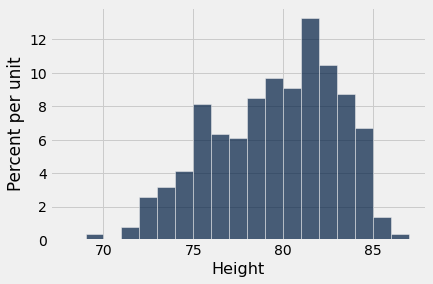

In [12]:
nba13.select('Height').hist(bins=np.arange(68, 88, 1))

In [13]:
mean_height = np.mean(nba13.column('Height'))
mean_height

79.06534653465347

In [14]:
sd_height = np.std(nba13.column('Height'))
sd_height

3.4505971830275546

In [15]:
nba13.sort('Height', descending=True).show(3)

In [16]:
87 - mean_height

7.934653465346528

In [17]:
(87 - mean_height)/sd_height

2.2995015194397923

In [18]:
nba13.sort('Height').show(3)

In [19]:
(69 - mean_height)/sd_height

-2.9169868288775844

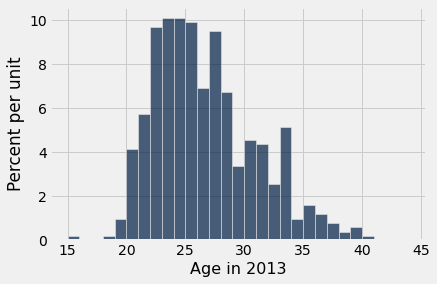

In [20]:
nba13.select('Age in 2013').hist(bins=np.arange(15, 45, 1))

In [21]:
ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.321200441720307)

In [22]:
nba13.sort('Age in 2013', descending=True).show(3)

In [23]:
(40 - mean_age)/sd_age

3.1958482778922357

In [24]:
def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    

In [25]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date   | Flight Number | Destination | Delay | Delay (Standard Units)
6/1/15 | 73            | HNL         | 257   | 6.08766
6/1/15 | 217           | EWR         | 28    | 0.287279
6/1/15 | 237           | STL         | -3    | -0.497924
6/1/15 | 250           | SAN         | 0     | -0.421937
6/1/15 | 267           | PHL         | 64    | 1.19913
6/1/15 | 273           | SEA         | -6    | -0.573912
6/1/15 | 278           | SEA         | -8    | -0.62457
6/1/15 | 292           | EWR         | 12    | -0.117987
6/1/15 | 300           | HNL         | 20    | 0.0846461
6/1/15 | 317           | IND         | -10   | -0.675228
... (13815 rows omitted)

In [26]:
united.sort('Delay', descending=True)

Date    | Flight Number | Destination | Delay | Delay (Standard Units)
6/21/15 | 1964          | SEA         | 580   | 14.269
6/22/15 | 300           | HNL         | 537   | 13.1798
6/21/15 | 1149          | IAD         | 508   | 12.4453
6/20/15 | 353           | ORD         | 505   | 12.3693
8/23/15 | 1589          | ORD         | 458   | 11.1788
7/23/15 | 1960          | LAX         | 438   | 10.6722
6/23/15 | 1606          | ORD         | 430   | 10.4696
6/4/15  | 1743          | LAX         | 408   | 9.91236
6/17/15 | 1122          | HNL         | 405   | 9.83637
7/27/15 | 572           | ORD         | 385   | 9.32979
... (13815 rows omitted)

In [27]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows

0.9790235081374322

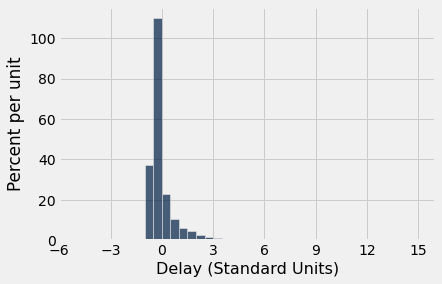

In [28]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3));